# Polynomial Regression

## Lab Assignment - Semiconductor Device I/V Prediction

The dataset is a plot of current variation of a device based on the voltage applied. The output is non linear in nature. We have to predict current based on voltage with non linear regression. 

Perform the following operations.

#### 1. Plot the voltage vs current. What degree of polynomial do you think is this?
#### 2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2. 
#### 3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it underfit, properly fit or overfit?
#### 4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 
#### 5. Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.
#### 6 Perform KFold Cross validation with k=3 to 10 for degree 2, 3, 4. 

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('diode_data.csv')
df.head()
# df

,voltage,current
0,-1.25,-3.164730
1,-1.20,-2.346773
2,-1.15,-1.305936
3,-1.10,-1.891162
4,-1.05,-1.040983


### 1. Plot the voltage vs current. What degree of polynomial do you think is this?

(69, 1)
(69, 1)
This is a Thrid Degree polynomial


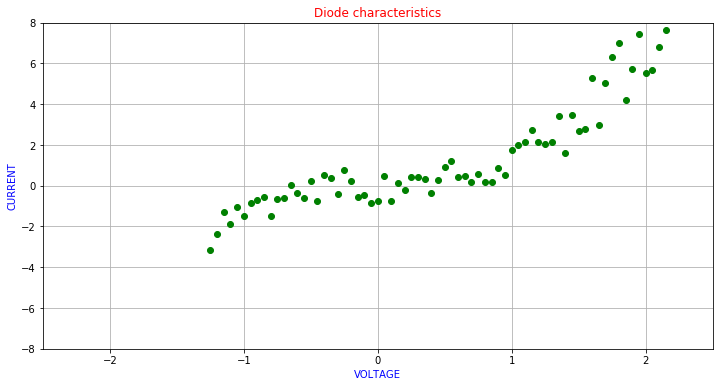

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X=np.array(df['voltage']).reshape(-1,1)
print(X.shape)
Y=np.array(df['current']).reshape(-1,1)
print(Y.shape)

plt.figure(figsize=[12,6])
plt.title("Diode characteristics",color='r')
plt.xlabel("VOLTAGE",color='b')
plt.ylabel("CURRENT",color='b')
plt.plot(X,Y,'go')
plt.axis([-2.5,2.5,-8,8])
plt.grid(True)
print("This is a Thrid Degree polynomial")

### 2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2.

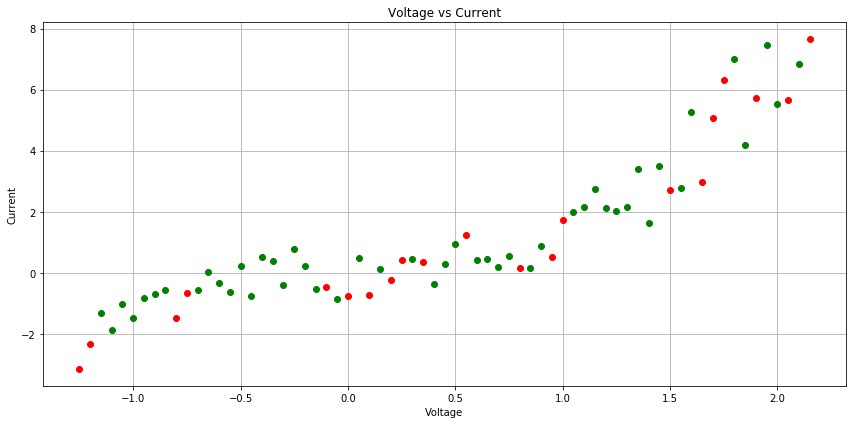

In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

v_train,v_test,c_train,c_test=train_test_split(X,Y,test_size=0.3,random_state=2)

plt.figure(figsize=[12,6])
plt.title("Voltage vs Current")
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.plot(v_train,c_train,'go')
plt.plot(v_test,c_test,'ro')
plt.tight_layout()
# plt.axis([-2.5,2.5,-8,8])
plt.grid(True)

poly=PolynomialFeatures(degree=2)
#degree=2,interaction _only,false,include,include_bias=True,order='c'

QuadraticCoeff = poly.fit_transform(X)
# print(QuadraticCoeff)

# print(Y)
# print(model.predict(QuadraticCoeff))

### 3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it underfit, properly fit or overfit?

Text(0,0.5,'Current')

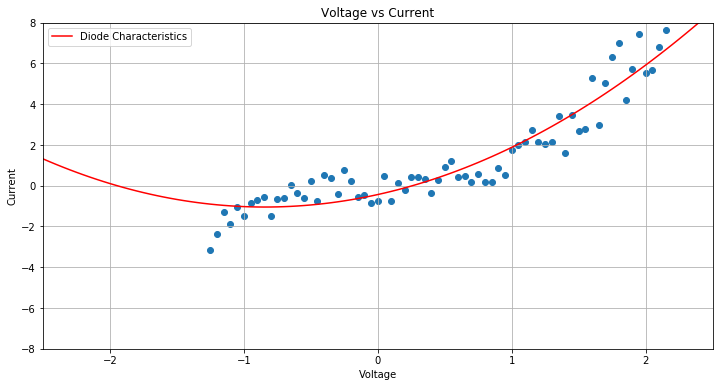

In [4]:
from sklearn.linear_model import LinearRegression

#Create and fit the model
model = LinearRegression()
model.fit(QuadraticCoeff,Y)

# print(c_test,model.predict(v_test))##predict o/

xx=np.linspace(-2.5,2.5,101).reshape(-1,1)

xx_quad=poly.fit_transform(xx)
plt.figure(figsize=[12,6])
plt.axis([-2.5,2.5,-8,8])
plt.grid(True)
plt.plot(xx,model.predict(xx_quad),color='r',linestyle='-',label="Diode Characteristics")
plt.scatter(X,Y)
plt.legend(loc=2)
plt.title("Voltage vs Current")
plt.xlabel("Voltage")
plt.ylabel("Current")

- This graph is under fit

### 4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score.

In [9]:
print(model.predict(v_test))
print(model.predict(c_test))


#Q5b
print(model.score(v_test,c_test)) #r^2 coefficent

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(c_test, model.predict(v_test), multioutput = 'uniform_average')

print("MSE IS",mse )

ValueError: shapes (21,1) and (11,1) not aligned: 1 (dim 1) != 11 (dim 0)

### Q5 Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.

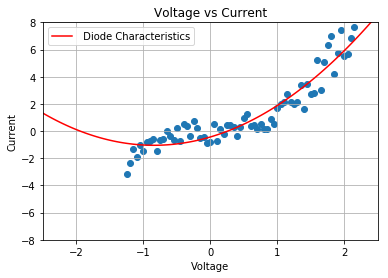

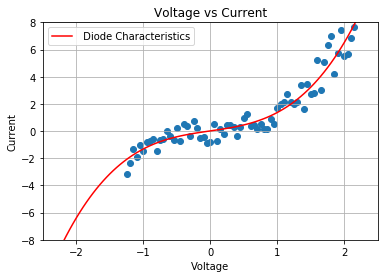

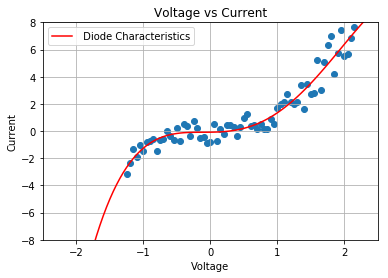

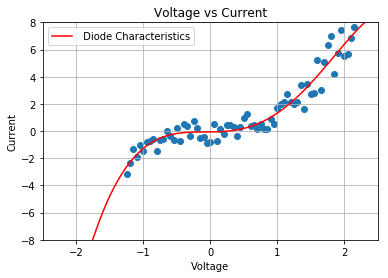

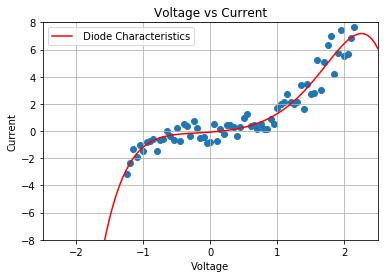

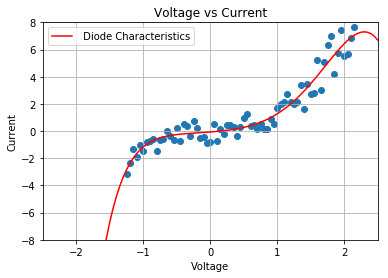

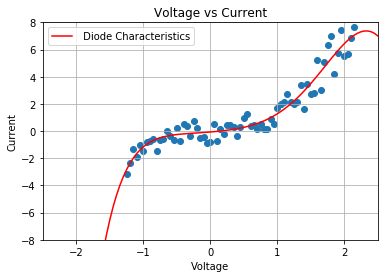

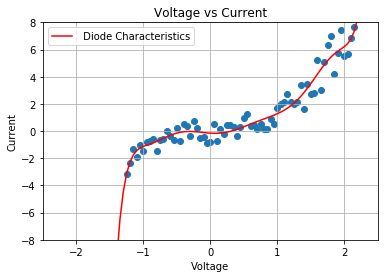

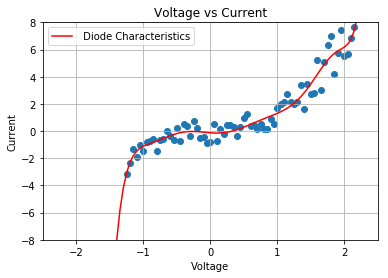

In [6]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
for i in range(2,11):
    poly=PolynomialFeatures(degree=i)
    QuadraticCoeff = poly.fit_transform(X)

    #Creat and fit the model
    model = LinearRegression()
    model.fit(QuadraticCoeff,Y)

    xx=np.linspace(-2.5,2.5,101).reshape(-1,1)

    xx_quad=poly.fit_transform(xx)
    plt.figure()
    plt.axis([-2.5,2.5,-8,8])
    plt.grid(True)
    plt.plot(xx,model.predict(xx_quad),color='r',linestyle='-',label=" Diode Characteristics")
    plt.scatter(X,Y)
    plt.legend(loc=2)
    plt.title("Voltage vs Current")
    plt.xlabel("Voltage")
    plt.ylabel("Current")

- The data start to overfit from degree 

- Hence, from the plots we can conclude that as the degree incrases the graph becomes over fit from under fit

### 6 Perform KFold Cross validation with k=3 to 10 for degree 2, 3, 4

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

for i in range(3,11):
    print("K fold {0}".format(i))
    for j in range(2,5):
        poly=PolynomialFeatures(degree=j)
        QuadraticCoeff = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(QuadraticCoeff,Y)
        scores = cross_val_score(model,df['voltage'].values.reshape(-1,1),df['current'].values.reshape(-1,1), cv=i)
        print("Cross-valinated scores:",scores)
        print("Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(),scores.std()*2))
        print("***************************************************************")